In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import skmob
import air_traff_utils as atu


# Visualization of OD (flatten it to 1-dimensional, then plot)

## dg

In [2]:
dg_labels = np.load('./res/deep_grav_labels.npy')
dg_pred = np.load('./res/deep_grav_pred.npy')
print(dg_labels.shape)
print(dg_pred.shape)


(288, 1)
(288, 1)


In [3]:
m = 0
print('The mae loss is %.4f'%atu.mae_loss_func(dg_pred, dg_labels, m))
print('The mape loss is %.4f'%atu.mape_loss_func(dg_pred, dg_labels, m))
print('The smape loss is %.4f'%atu.smape_loss_func(dg_pred, dg_labels, m))
print('The nrmse loss is %.4f'%atu.nrmse_loss_func(dg_pred, dg_labels, m))
print('The nmae loss is %.4f'%atu.nmae_loss_func(dg_pred, dg_labels, m))
print('CPC is %.4f'%atu.get_CPC(dg_pred, dg_labels))

The mae loss is 0.2911
The mape loss is 3.0385
The smape loss is 0.9079
The nrmse loss is 0.3729
The nmae loss is 0.2911
CPC is 0.5449


/Users/kaihangzhang/Downloads/GitHub/Air_Traffic/air_traff_utils.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


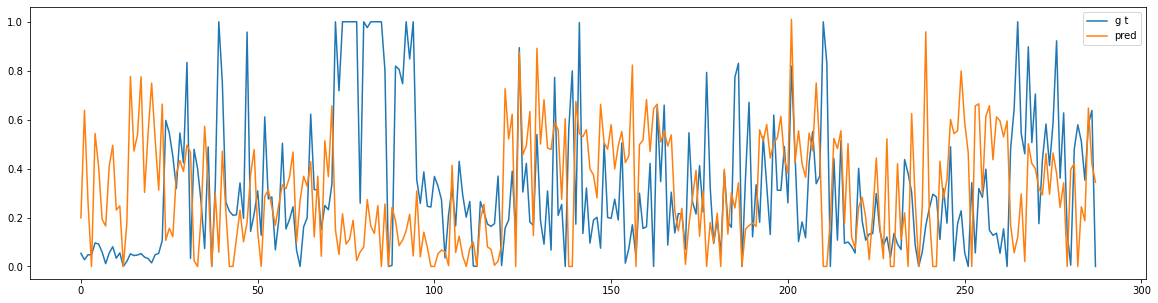

In [4]:
plt.figure(figsize = (20,5))
plt.plot(dg_labels, label='g t')
plt.plot(dg_pred, label='pred')
plt.legend()

## dgm

In [5]:
dgm_labels = np.load('./res/deep_grav_multi_labels.npy')
dgm_pred = np.load('./res/deep_grav_multi_pred.npy')
print(dgm_labels.shape)
print(dgm_pred.shape)


(288, 1)
(288, 1)


In [6]:
m = 0
print('The mae loss is %.4f'%atu.mae_loss_func(dgm_pred, dgm_labels, m))
print('The mape loss is %.4f'%atu.mape_loss_func(dgm_pred, dgm_labels, m))
print('The smape loss is %.4f'%atu.smape_loss_func(dgm_pred, dgm_labels, m))
print('The nrmse loss is %.4f'%atu.nrmse_loss_func(dgm_pred, dgm_labels, m))
print('The nmae loss is %.4f'%atu.nmae_loss_func(dgm_pred, dgm_labels, m))
print('CPC is %.4f'%atu.get_CPC(dgm_pred, dgm_labels))

The mae loss is 0.2648
The mape loss is 2.6646
The smape loss is 0.8533
The nrmse loss is 0.3298
The nmae loss is 0.2648
CPC is 0.6040


/Users/kaihangzhang/Downloads/GitHub/Air_Traffic/air_traff_utils.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


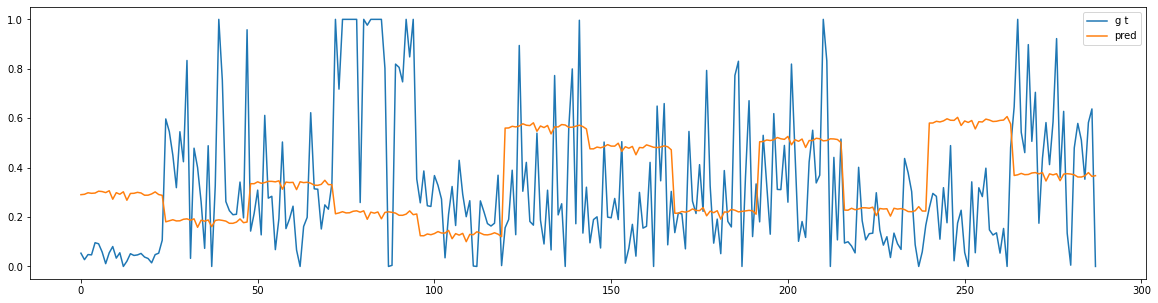

In [7]:
plt.figure(figsize = (20,5))
plt.plot(dgm_labels, label='g t')
plt.plot(dgm_pred, label='pred')
plt.legend()

# Gravity

In [8]:
# g = pd.read_csv('./res/gravity.csv', index_col=0)
# np.save('./res/gravity_pred.npy', g.to_numpy().reshape(-1, 1)[288:])

# np.save('./res/gravity_pred.npy', g_pred.reshape(173, 1))

In [9]:
g_labels = np.load('./res/deep_grav_multi_labels.npy')
g_pred = np.load('./res/gravity_pred.npy')
print(g_labels.shape)
print(g_pred.shape)

(288, 1)
(288, 1)


In [10]:
m = 0
print('The mae loss is %.4f'%atu.mae_loss_func(g_pred, g_labels, m))
print('The mape loss is %.4f'%atu.mape_loss_func(g_pred, g_labels, m))
print('The smape loss is %.4f'%atu.smape_loss_func(g_pred, g_labels, m))
print('The nrmse loss is %.4f'%atu.nrmse_loss_func(g_pred, g_labels, m))
print('The nmae loss is %.4f'%atu.nmae_loss_func(g_pred, g_labels, m))
print('CPC is %.4f'%atu.get_CPC(g_pred, g_labels))

The mae loss is 0.1402
The mape loss is 3.3523
The smape loss is 0.4594
The nrmse loss is 0.2052
The nmae loss is 0.1402
CPC is 0.7932


/Users/kaihangzhang/Downloads/GitHub/Air_Traffic/air_traff_utils.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


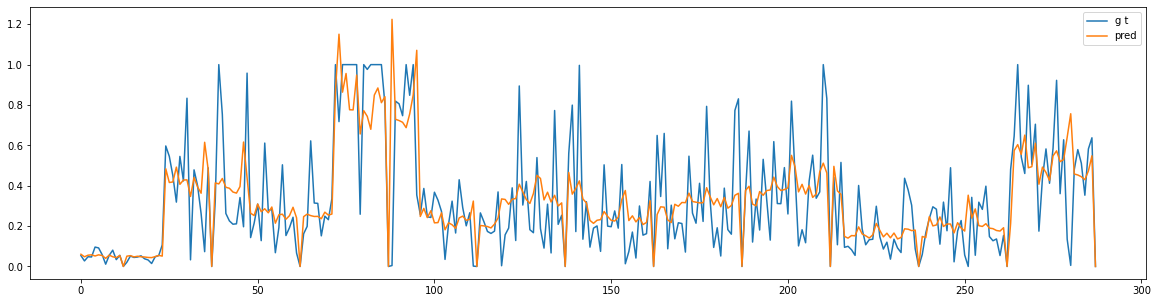

In [11]:
plt.figure(figsize = (20,5))
plt.plot(g_labels, label='g t')
plt.plot(g_pred, label='pred')
plt.legend()

# results in one graph

In [12]:
color_lst = ['blue', 'green', 'orange', 'cyan']
alpha_lst = [1,.7,.7, .7]
lw_ls = [1.5,1,1, 1]

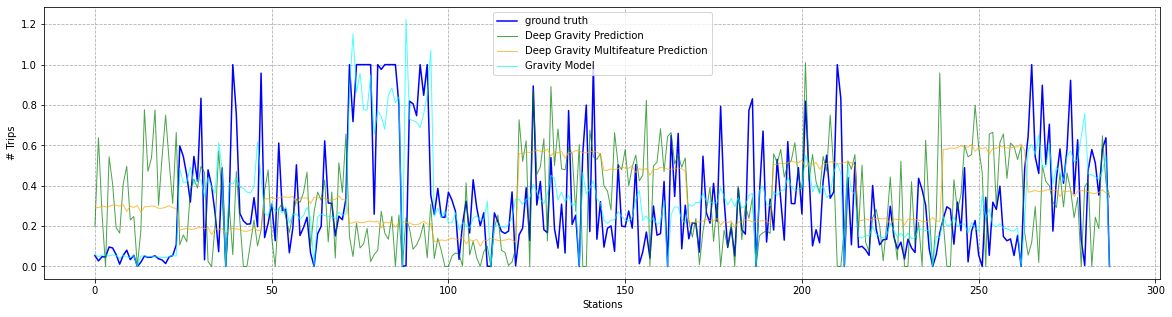

In [14]:
# 把真实值、dg、dgm画在一个图上，
# 颜色、alpha、lw设置使用上面定义的列表中的值
# 真实值是蓝色，和其他对应的alpha、lw
# dg是绿色，dgm是橙色
plt.figure(figsize=[20,5])
plt.plot(dg_labels, label='ground truth', lw=lw_ls[0],color = color_lst[0],alpha = alpha_lst[0])
plt.plot(dg_pred, label='Deep Gravity Prediction', lw=lw_ls[1],color = color_lst[1],alpha = alpha_lst[1])
plt.plot(dgm_pred, label='Deep Gravity Multifeature Prediction', lw=lw_ls[2],color = color_lst[2],alpha = alpha_lst[2])
plt.plot(g_pred, label='Gravity Model', lw=lw_ls[3],color = color_lst[3],alpha = alpha_lst[3])
plt.xlabel('Stations')
plt.ylabel('# Trips')
plt.legend()
plt.grid(ls='--')